<a href="https://colab.research.google.com/github/mlcurva77/UTS_ML2019_ID10885123/blob/master/ML2019_ID10885123_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Analytics and Topic Modelling

## Overview

Any company or organisation generates a significant amount of documentation to record information about their business. The process of analysing the documents takes a lot of time and resources, which makes it slow and inefficient. Text Analytics helps to resolve this issue. Text Analytics is the automated process of analysing text documents and deriving meaningful information from unstructured data.

This report aims to analyse a portfolio of documents from Ernst and Young (EY) to learn about the company’s values and what is important to them when working with other organisations.  Text Analytics and Topic Modelling will be used to examine and derive meaningful insights from the documents. The Natural Language Toolkit (NLTK) was used for performing Text Analytics and Gensim for Topic Modelling. 

## Data Description

There were twenty-eight (28) text documents from EY with varying content and sizes. All documents were loaded in GoogleColab from the Google Drive directory. The list of files are shown below with the corresponding number of words per document.

| Number of Words | File Name |
|---| --- |
| 713 | 01_AFR1.txt
| 751	| 01_AFR2.txt
| 1360	| 01_AFR3.txt
| 906	| 01_AFR4.txt
| 399	| 02_EY1.txt
| 694	| 02_EY2.txt
| 3577	| 02_EY3.txt
| 12457	| 02_EY4.txt
| 6403	| 02_EY5.txt
| 7583	| 02_EY6.txt
| 14264	| 02_EY7.txt
| 821	| 02_EY8.txt
| 1460	| 03_EY1.txt
| 949	| 03_EY10.txt
| 1305	| 03_EY2.txt
| 1044	| 03_EY3.txt
| 515	| 03_EY4.txt
| 560	| 03_EY5.txt
| 865	| 03_EY6.txt
| 1371	| 03_EY7.txt
| 1245	| 03_EY8.txt
| 1201	| 03_EY9.txt
| 3603	| 04_EY1.txt
| 402	| 05_UNSW1.txt
| 1345	| 05_UQ1.txt
| 697	| 05_USYD1.txt
| 578	| 05_UTS1.txt
| 856	| 05_UWA1.txt

All the documents are unstructured which require to be tokenised and transformed for analysis. Tokenisation is the process of breaking down a text paragraph into into sentences or words. The following transformation were performed on the documents after the documents were tokenised.

* Removal of punctuation using the string package.
* Stemming and Lemmatization. Stemming and Lemmatization are two similar processes of language normalisation, which reduces words to their word root word or removing the derivational affixes.
* Removal of common english stopwords. Stopwords such as is, am, are, this, a, an, the, etc. are considered noise and do not add value to the analysis.


## Solution

## 1. Loading the Packages used for the model.


*   NLTK - The Natural Language Toolkit (NLTK) is an open source Python library for Natural Language Processing.
*   re - This module provides regular expression matching operations similar to those found in Perl.
* numpy - NumPy is the fundamental package for scientific computing with Python. 
* Gensim - Gensim is a Python library for topic modelling, document indexing and similarity retrieval with large corpora.
* Python library for interactive topic model visualization.
* Using spaCy for POS tagging. spaCy is a package used for tagging, parsing and named entity recognition.



In [1]:
#Loading NLTK
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer, SnowballStemmer
#from nltk.stem.porter import *

!pip install -q nltk==3.4.3

import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
     |████████████████████████████████| 1.5MB 2.8MB/s 
     |████████████████████████████████| 1.6MB 2.8MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=74738334e69b21a2a3469426a14acecc04f7a5d690be3134a946e0443cbde9d8
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


##2. Connecting to GoogleColab

In [0]:
inGoogleColab = True
folderpath_base = '/content/drive/My Drive/Docs'


from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
print(folderpath_base)

/content/drive/My Drive/Docs


## 3. Loading the EY documents for analysis and Topic Modelling.

In [0]:
import os
from nltk.corpus import PlaintextCorpusReader

#print(os.getcwd())
#corpus_root = os.getcwd() + "\Docs"
#print (corpus_root)

# .txt file names as file IDs
file_ids = ".*.txt"
#corpus = nltk.corpus.reader.PlaintextCorpusReader(corpus_root, file_ids,encoding='latin-1')
corpus = nltk.corpus.reader.PlaintextCorpusReader(folderpath_base, file_ids,encoding='latin-1')

#print(corpus.fileids())
print(corpus)

<PlaintextCorpusReader in '/content/drive/My Drive/Docs'>


In [0]:
# for-loop through file IDs and print out word count. 
for f in corpus.fileids():
    print(len(corpus.words(f)), f)

713 01_AFR1.txt
751 01_AFR2.txt
1360 01_AFR3.txt
906 01_AFR4.txt
399 02_EY1.txt
694 02_EY2.txt
3577 02_EY3.txt
12457 02_EY4.txt
6403 02_EY5.txt
7583 02_EY6.txt
14264 02_EY7.txt
821 02_EY8.txt
1460 03_EY1.txt
949 03_EY10.txt
1305 03_EY2.txt
1044 03_EY3.txt
515 03_EY4.txt
560 03_EY5.txt
865 03_EY6.txt
1371 03_EY7.txt
1245 03_EY8.txt
1201 03_EY9.txt
3603 04_EY1.txt
402 05_UNSW1.txt
1345 05_UQ1.txt
697 05_USYD1.txt
578 05_UTS1.txt
856 05_UWA1.txt


In [0]:
# Corpus size in number of words
print(len(corpus.words()))

67924


In [0]:
tokenized_word = corpus.words()
#print(tokenized_word[:60])

print(tokenized_word)
import string
exclude = set(string.punctuation) 
print(exclude)

nopunctuation_word=[]
for w in tokenized_word:
    if w not in exclude:
        nopunctuation_word.append(w)
        
print("nopunctuation:",nopunctuation_word[:100])

['US', 'business', 'leader', 'Kay', 'Koplovitz', ...]
{'@', '~', ']', '*', '?', '.', '_', '(', ';', '"', '/', '{', '%', '&', '|', '`', '$', '[', ',', ')', '\\', '!', '}', '+', '<', '=', '^', ':', '-', '#', "'", '>'}
nopunctuation: ['US', 'business', 'leader', 'Kay', 'Koplovitz', 'forges', 'new', 'ground', 'for', 'female', 'entrepreneurs', 'by', 'Joanne', 'Gray', 'Women', 'in', 'science', 'and', 'technology', 'are', 'gaining', 'a', 'higher', 'profile', 'in', 'Australia', 'as', 'entrepreneurs', 'says', 'Kay', 'Koplovitz', 'a', 'leading', 'successful', 'businesswoman', 'in', 'the', 'US', 'and', 'founder', 'of', 'USA', 'Network', 'Her', 'successful', 'incubator', 'Springboard', 'Enterprises', 'launched', 'in', 'Australia', 'five', 'years', 'ago', 'trains', 'women', 'founders', 'with', 'potentially', 'high', 'growth', 'businesses', 'to', 'raise', 'venture', 'capital', 'with', 'a', '12', 'week', 'course', 'and', 'a', 'two', 'day', 'boot', 'camp', 'which', 'runs', 'this', 'week', 'Women', 'ar

In [0]:
from nltk.probability import FreqDist

fdist = FreqDist(nopunctuation_word)
print(fdist)
fdist.most_common(20)

<FreqDist with 7473 samples and 60961 outcomes>


[('the', 2501),
 ('and', 2416),
 ('to', 1785),
 ('of', 1748),
 ('in', 1046),
 ('a', 989),
 ('EY', 636),
 ('for', 593),
 ('\x92', 539),
 ('is', 532),
 ('our', 484),
 ('with', 466),
 ('that', 461),
 ('s', 394),
 ('The', 372),
 ('on', 366),
 ('are', 360),
 ('as', 312),
 ('Limited', 290),
 ('we', 284)]

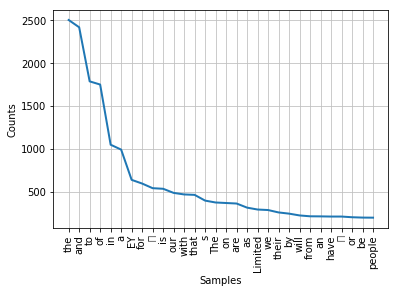

In [0]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [0]:
lower_word = [word.lower() for word in nopunctuation_word]
print(lower_word[:100])

filtered_word=[]
for w in lower_word:
    if w not in stop_words:
        filtered_word.append(w)
#print("nopunctuation:",nopunctuation_word)
print("Filtered:",filtered_word)

['us', 'business', 'leader', 'kay', 'koplovitz', 'forges', 'new', 'ground', 'for', 'female', 'entrepreneurs', 'by', 'joanne', 'gray', 'women', 'in', 'science', 'and', 'technology', 'are', 'gaining', 'a', 'higher', 'profile', 'in', 'australia', 'as', 'entrepreneurs', 'says', 'kay', 'koplovitz', 'a', 'leading', 'successful', 'businesswoman', 'in', 'the', 'us', 'and', 'founder', 'of', 'usa', 'network', 'her', 'successful', 'incubator', 'springboard', 'enterprises', 'launched', 'in', 'australia', 'five', 'years', 'ago', 'trains', 'women', 'founders', 'with', 'potentially', 'high', 'growth', 'businesses', 'to', 'raise', 'venture', 'capital', 'with', 'a', '12', 'week', 'course', 'and', 'a', 'two', 'day', 'boot', 'camp', 'which', 'runs', 'this', 'week', 'women', 'are', 'coming', 'up', 'with', 'enormously', 'important', 'disruptive', 'technologies', 'in', 'science', ',"', 'she', 'said', 'we', 're', 'shedding', 'a', 'light']
Filtered: ['business', 'leader', 'kay', 'koplovitz', 'forges', 'ground

In [0]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

stemmed_word=[]
for w in filtered_word:
    stemmed_word.append(ps.stem(w))

#print("filtered:",filtered_word)
print("Stemmed:",stemmed_word)

Stemmed: ['busi', 'leader', 'kay', 'koplovitz', 'forg', 'ground', 'femal', 'entrepreneur', 'joann', 'gray', 'women', 'scienc', 'technolog', 'gain', 'higher', 'profil', 'australia', 'entrepreneur', 'say', 'kay', 'koplovitz', 'lead', 'success', 'businesswoman', 'founder', 'usa', 'network', 'success', 'incub', 'springboard', 'enterpris', 'launch', 'australia', 'five', 'year', 'ago', 'train', 'women', 'founder', 'potenti', 'high', 'growth', 'busi', 'rais', 'ventur', 'capit', '12', 'week', 'cours', 'boot', 'camp', 'run', 'week', 'women', 'come', 'enorm', 'import', 'disrupt', 'technolog', 'scienc', ',"', 'shed', 'light', 'women', 'engin', 'scientif', 'technolog', 'background', 'term', 'deploy', 'technolog', 'advanc', 'busi', 'support', 'system', '."', 'koplovitz', 'start', 'springboard', 'enterpris', '2000', 'head', 'presid', 'bill', 'clinton', 'women', 'busi', 'council', 'role', 'say', 'float', 'boat', 'builder', 'thought', 'realli', 'advanc', 'women', '?"', 'women', 'founder', 'receiv', '2

In [0]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

lm_word=[]
for w in stemmed_word:
    lm_word.append(lem.lemmatize(w,"v"))

print("Lemmatized:",lm_word[:100])

Lemmatized: ['busi', 'leader', 'kay', 'koplovitz', 'forg', 'grind', 'femal', 'entrepreneur', 'joann', 'gray', 'women', 'scienc', 'technolog', 'gain', 'higher', 'profil', 'australia', 'entrepreneur', 'say', 'kay', 'koplovitz', 'lead', 'success', 'businesswoman', 'founder', 'usa', 'network', 'success', 'incub', 'springboard', 'enterpris', 'launch', 'australia', 'five', 'year', 'ago', 'train', 'women', 'founder', 'potenti', 'high', 'growth', 'busi', 'rais', 'ventur', 'capit', '12', 'week', 'cours', 'boot', 'camp', 'run', 'week', 'women', 'come', 'enorm', 'import', 'disrupt', 'technolog', 'scienc', ',"', 'shed', 'light', 'women', 'engin', 'scientif', 'technolog', 'background', 'term', 'deploy', 'technolog', 'advanc', 'busi', 'support', 'system', '."', 'koplovitz', 'start', 'springboard', 'enterpris', '2000', 'head', 'presid', 'bill', 'clinton', 'women', 'busi', 'council', 'role', 'say', 'float', 'boat', 'builder', 'think', 'realli', 'advanc', 'women', '?"', 'women', 'founder']


In [0]:
clean_word = [word.lower() for word in lm_word]
print(clean_word[:100])

['busi', 'leader', 'kay', 'koplovitz', 'forg', 'grind', 'femal', 'entrepreneur', 'joann', 'gray', 'women', 'scienc', 'technolog', 'gain', 'higher', 'profil', 'australia', 'entrepreneur', 'say', 'kay', 'koplovitz', 'lead', 'success', 'businesswoman', 'founder', 'usa', 'network', 'success', 'incub', 'springboard', 'enterpris', 'launch', 'australia', 'five', 'year', 'ago', 'train', 'women', 'founder', 'potenti', 'high', 'growth', 'busi', 'rais', 'ventur', 'capit', '12', 'week', 'cours', 'boot', 'camp', 'run', 'week', 'women', 'come', 'enorm', 'import', 'disrupt', 'technolog', 'scienc', ',"', 'shed', 'light', 'women', 'engin', 'scientif', 'technolog', 'background', 'term', 'deploy', 'technolog', 'advanc', 'busi', 'support', 'system', '."', 'koplovitz', 'start', 'springboard', 'enterpris', '2000', 'head', 'presid', 'bill', 'clinton', 'women', 'busi', 'council', 'role', 'say', 'float', 'boat', 'builder', 'think', 'realli', 'advanc', 'women', '?"', 'women', 'founder']


<FreqDist with 4194 samples and 33517 outcomes>


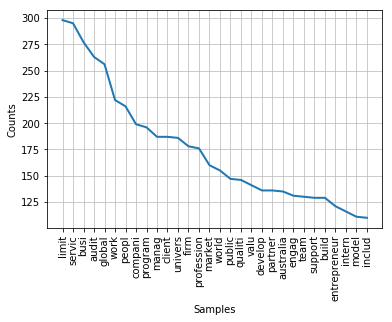

In [0]:
fdist = FreqDist(clean_word)
print(fdist)
fdist.most_common(20)

import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Package webtext is already up-to-date!


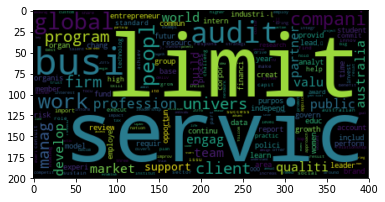

In [0]:
from nltk.corpus import webtext
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
nltk.download('webtext')
#wt_words = webtext.words('testing.txt')  # Sample data
data_analysis = nltk.FreqDist(clean_word)
 
filter_words = dict([(m, n) for m, n in data_analysis.items() if len(m) > 1])
 
wcloud = WordCloud().generate_from_frequencies(filter_words)
 
# Plotting the wordcloud
plt.imshow(wcloud, interpolation="bilinear")
 
plt.axis("on")
(-0.5, 499.5, 299.5, -0.5)
plt.show()

#Gensim

In [0]:
#tokenized_sent = corpus.sents()
#print(tokenized_sent)

tokenized_sent = corpus.sents()
print(tokenized_sent[0])

['US', 'business', 'leader', 'Kay', 'Koplovitz', 'forges', 'new', 'ground', 'for', 'female', 'entrepreneurs', 'by', 'Joanne', 'Gray', 'Women', 'in', 'science', 'and', 'technology', 'are', 'gaining', 'a', 'higher', 'profile', 'in', 'Australia', 'as', 'entrepreneurs', ',', 'says', 'Kay', 'Koplovitz', ',', 'a', 'leading', 'successful', 'businesswoman', 'in', 'the', 'US', 'and', 'founder', 'of', 'USA', 'Network', '.']


In [0]:
def sent_to_words(sentences):
    for sentence in sentences:
        #print(sentence)
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))# deacc=True removes punctuations

data_words = list(sent_to_words(tokenized_sent))

print(data_words[:2])

[['us', 'business', 'leader', 'kay', 'koplovitz', 'forges', 'new', 'ground', 'for', 'female', 'entrepreneurs', 'by', 'joanne', 'gray', 'women', 'in', 'science', 'and', 'technology', 'are', 'gaining', 'higher', 'profile', 'in', 'australia', 'as', 'entrepreneurs', 'says', 'kay', 'koplovitz', 'leading', 'successful', 'businesswoman', 'in', 'the', 'us', 'and', 'founder', 'of', 'usa', 'network'], ['her', 'successful', 'incubator', 'springboard', 'enterprises', 'launched', 'in', 'australia', 'five', 'years', 'ago', 'trains', 'women', 'founders', 'with', 'potentially', 'high', 'growth', 'businesses', 'to', 'raise', 'venture', 'capital', 'with', 'week', 'course', 'and', 'two', 'day', 'boot', 'camp', 'which', 'runs', 'this', 'week']]


In [0]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[1]]])

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['her', 'successful', 'incubator', 'springboard', 'enterprises', 'launched', 'in', 'australia', 'five', 'years_ago', 'trains', 'women', 'founders', 'with', 'potentially', 'high', 'growth', 'businesses', 'to', 'raise', 'venture_capital', 'with', 'week', 'course', 'and', 'two', 'day', 'boot', 'camp', 'which', 'runs', 'this', 'week']


In [0]:
from nltk.corpus import stopwords
stop_words=stopwords.words("english")
print(len(stop_words))

stop_words.extend(["can", "say","one","way","use","here","I",
                 "also","howev","tell","will","help","also",
                 "much","need","take","tend","even","us","US"
                 "like","particular","rather","said","EY","ey"
                 "get","well","make","ask","come","end",
                 "first","two","help","often","may",
                 "might","see","someth","thing","point",
                 "post","look","right","now","think","'ve ",
                 "'re ","anoth","put","set","new","good",
                 "want","sure","kind","larg","yes,","day","etc",
                 "quit","sinc","attempt","lack","seen","awar",
                 "littl","ever","moreov","though","found","abl",
                 "enough","far","earli","away","achiev","draw",
                 "last","never","brief","bit","entir","brief",
                 "great","lot","include","provide","year","new","help",
                 "includ","one","require","use","make","better",
                 "way","like","across","valu","provide","young","continu",
                 "tropfest","ernst","four","limit","and","however", "\x92", "\x93","\x94",
                 "\x95","\x96","\x97","\x98","\x99","the","in","because","includ","this","those","where","ey","aaditya",
                  "includ","go","get","many","less","year","number","give"])
print(len(stop_words))
print(stop_words)

179
313
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', '

In [0]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [0]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])


[['business', 'leader', 'kay', 'koplovitz', 'forge', 'ground', 'female', 'entrepreneur', 'gray', 'woman', 'science', 'technology', 'gain', 'high', 'profile', 'australia', 'entrepreneur', 'say', 'kay', 'koplovitz', 'lead', 'successful', 'businesswoman', 'founder', 'usa', 'network']]


In [0]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)]]


In [0]:
id2word[1]

'business'

In [0]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('australia', 1),
  ('business', 1),
  ('businesswoman', 1),
  ('entrepreneur', 2),
  ('female', 1),
  ('forge', 1),
  ('founder', 1),
  ('gain', 1),
  ('gray', 1),
  ('ground', 1),
  ('high', 1),
  ('kay', 2),
  ('koplovitz', 2),
  ('lead', 1),
  ('leader', 1),
  ('network', 1),
  ('profile', 1),
  ('say', 1),
  ('science', 1),
  ('successful', 1),
  ('technology', 1),
  ('usa', 1),
  ('woman', 1)]]

In [0]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=6, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [0]:
# Print the Keyword in the 4 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.040*"business" + 0.023*"people" + 0.023*"work" + 0.020*"university" + '
  '0.019*"idea" + 0.014*"organisation" + 0.014*"opportunity" + 0.013*"world" + '
  '0.012*"support" + 0.010*"scholarship"'),
 (1,
  '0.033*"research" + 0.021*"impact" + 0.017*"year" + 0.015*"australian" + '
  '0.014*"change" + 0.013*"polson" + 0.013*"would" + 0.013*"accounting" + '
  '0.012*"national" + 0.011*"investment"'),
 (2,
  '0.026*"win" + 0.023*"project" + 0.015*"event" + 0.014*"equipment" + '
  '0.013*"competition" + 0.011*"grow" + 0.010*"return" + 0.010*"social" + '
  '0.009*"run" + 0.009*"engage"'),
 (3,
  '0.040*"company" + 0.028*"global" + 0.018*"future" + 0.017*"firm" + '
  '0.016*"employee" + 0.011*"tax" + 0.011*"australia" + 0.011*"large" + '
  '0.010*"pitch" + 0.009*"sponsor"'),
 (4,
  '0.031*"service" + 0.020*"big" + 0.016*"engineering" + 0.015*"analytic" + '
  '0.014*"datum" + 0.014*"create" + 0.014*"client" + 0.013*"firm" + '
  '0.012*"include" + 0.012*"provide"'),
 (5,
  '0.046*"stude

In [0]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.137580497819279

Coherence Score:  0.4378039257496782


In [0]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis